# Jupyter Notebook Showcase

**by Ian McLoughlin (ian.mcloughlin@gmit.ie)**

This notebook contains a demonstration analysing a data set using Python.
The benefit to the student is that they can take this interactive notebook and play around with it.

***

## A little context

My goal is to demonstrate that programming is accessible to non-computing students.

I'm using the [Python programming language](https://www.python.org/about/gettingstarted/).

I think this notebook is useful for students of all disciplines, whether they be in the formal sciences, natural sciences, social sciences, engineering, etc.

We'll soon have our first wave of incoming students having taken Computer Science at second level.

***

## About the data set

![Ronald Fisher](https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG)

***

## Load a data set

![Iris](http://www.oranchak.com/three-irises.jpg)

Using Python we can easily load a comma separated values (CSV) file to analyse it.
We'll load [Fisher's famous Iris data set](https://github.com/ianmcloughlin/datasets/raw/master/iris.csv).

In [2]:
# pandas is a Python package for investigating data sets.
import pandas as pd

# We can load a CSV file directly from a URL.
df = pd.read_csv("https://github.com/ianmcloughlin/datasets/raw/master/iris.csv")

# Have a look at the first five rows of the data set.
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


***

## Plot the data

The data set contains five variables, and so is difficult to visualise.
Luckily somebody has written a Python package called seaborn with a lovely plot suited to it.

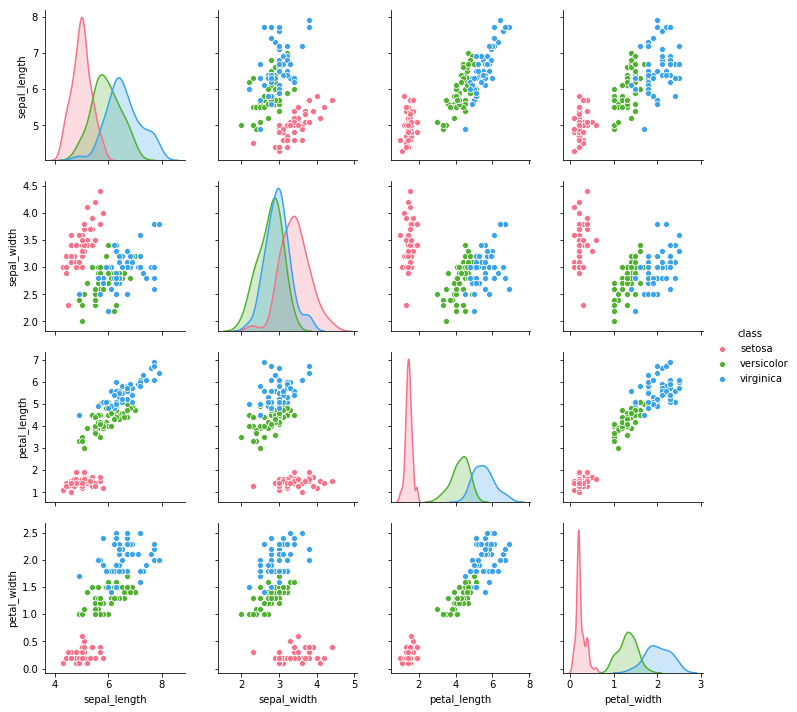

In [15]:
# seaborn is named after Rob Lowe's character in The West Wing.
import seaborn as sns

# A pair plot will create a matrix of scatter plots.
pp = sns.pairplot(df, hue="class", palette="husl")

***

## Formulate a problem

Fisher was interested in knowing whether the class could be predicted from the other variables.

$$f(sl, sw, pl, pw) = class$$

Can we figure out a good $f$ from the data set?

***

## Try a simpler problem

The setosa class looks quite a bit different to the other two.

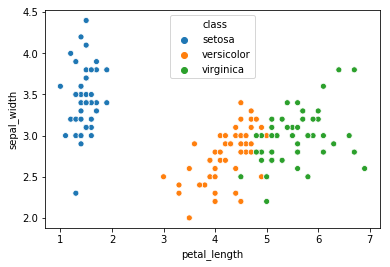

In [18]:
# Let's single out two of the numeric variables.
g = sns.scatterplot(x="petal_length", y="sepal_width", hue="class", data=df)

***

## Train a neural network

In [13]:
# For building neural networks.
import keras as kr

# For interacting with data sets.
import pandas as pd

# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test sets.
import sklearn.model_selection as mod

inputs = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

encoder = pre.LabelBinarizer()
encoder.fit(df['class'])
outputs = encoder.transform(df['class'])

# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 64 neurons and an input layer with 4.
model.add(kr.layers.Dense(units=64, activation='relu', input_dim=4))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=3, activation='softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the neural network.
model.fit(inputs, outputs, epochs=2, batch_size=10)

Epoch 1/2
150/150 [==============================] - 1s 6ms/step - loss: 1.1811
Epoch 2/2
150/150 [==============================] - 0s 322us/step - loss: 0.9819


In [12]:
df[df['class'] == 'versicolor'].mean()

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

In [16]:
import numpy as np

model.predict(np.array([(5.936, 2.770, 4.260, 1.326)]))

array([[0.07526421, 0.7021175 , 0.22261836]], dtype=float32)

In [17]:
encoder.inverse_transform(model.predict(np.array([(5.936, 2.770, 4.260, 1.326)])))

array(['versicolor'], dtype='<U10')

## Graphics